Import necessary modules

In [12]:
## for data
import pandas as pd
import numpy as np
from ast import literal_eval
import re

## for plotting
import matplotlib.pyplot as plt


# for ML prep amd ML
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
import sklearn.metrics as sm
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop

Reading Data and sampling it to digestible format

In [13]:
df_train = pd.read_csv('C:/Users/Marc/Dropbox/06_ESCP/01_Uni/04_Term 2/10_NLP with Python/02_Assingment 4&5/train_a4_5.csv')

In [14]:
df_test= pd.read_csv('C:/Users/Marc/Dropbox/06_ESCP/01_Uni/04_Term 2/10_NLP with Python/02_Assingment 4&5/test_a4_5.csv')

In [15]:
# take the sample random rather then just the top 10000
df_train_r = df_train.sample(n=10000, random_state=1)

Checking for and removing NaN in keywords

In [16]:
# Checking how many NaN there are, then dropping
df_train_r.info()
df_train_r = df_train_r.dropna(subset=['keywords'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3644682 to 2384596
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        10000 non-null  int64 
 1   keywords  8828 non-null   object
 2   age       10000 non-null  int64 
 3   sex       10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 390.6+ KB


In [17]:
#Verifying if NaN are reduced
df_train_r.info()
# Sex and age given, question what to do with the ngrams
# -> tokenization has already happened, lemmatization could still be done, stopwords?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8828 entries, 3644682 to 2384596
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        8828 non-null   int64 
 1   keywords  8828 non-null   object
 2   age       8828 non-null   int64 
 3   sex       8828 non-null   object
dtypes: int64(2), object(2)
memory usage: 344.8+ KB


Rename DF and features for comprehensiveness


In [18]:
df_train_r['sex'].replace('M', 1, inplace = True)
df_train_r['sex'].replace('F', 0, inplace = True)
dtf = df_train_r.rename(columns = {'keywords': 'text', 'sex': 'y'})

In [19]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8828 entries, 3644682 to 2384596
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      8828 non-null   int64 
 1   text    8828 non-null   object
 2   age     8828 non-null   int64 
 3   y       8828 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 344.8+ KB


See distribution for features: 'Age'

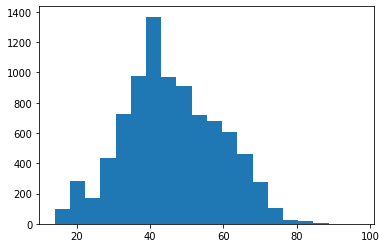

In [20]:
plt.hist(dtf.age, bins = 20)
plt.show()

In [23]:
#clean stopwords out of list
final_stopwords_list = list(fr_stop)

dtf['text'] = [i.replace(":", "':") for i in dtf.text]
dtf['text'] = [i.replace(";", ",'") for i in dtf.text]
dtf['text'] = ["{'" + i + "}" for i in dtf.text]
dtf['text'] = [literal_eval(i) for i in dtf.text]

SyntaxError: invalid syntax (<unknown>, line 1)

In [22]:
text_cleaned = []

for dict in dtf.text:
    for word in final_stopwords_list:
        if word in dict:
            del dict[word]
    text_cleaned.append(dict)

dtf['text_cleaned'] = text_cleaned

TypeError: 'str' object does not support item deletion

In [ ]:
dtf['text_cleaned'] = [str(i).replace("':", ":") for i in dtf.text_cleaned]
dtf['text_cleaned'] = [str(i).replace(",'", ";") for i in dtf.text_cleaned]
dtf['text_cleaned'] = [str(i).replace("{", "") for i in dtf.text_cleaned]
dtf['text_cleaned'] = [str(i).replace("}", "") for i in dtf.text_cleaned]

NLP - create feature matrix

In [ ]:
# creating the feature matrix
matrix = CountVectorizer(max_features=2000)
X = matrix.fit_transform(dtf.text_cleaned).toarray()


# Age Predicition

Linear Model (Lasso)

In [ ]:
y_reg = df_train_r.age

In [ ]:
X_train, X_test, y_train_r, y_test_r = train_test_split(X, y_reg)


In [ ]:
# Linear Regression
linreg = LinearRegression()

linreg.fit(X_train, y_train_r)

# Predict Class
y_pred_linreg = np.round(linreg.predict(X_test))

# Metrics
print("Mean absolute error =", round(sm.mean_absolute_error(y_test_r, y_pred_linreg), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test_r, y_pred_linreg), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test_r, y_pred_linreg), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test_r, y_pred_linreg), 2))
print("R2 score =", round(sm.r2_score(y_test_r, y_pred_linreg), 2))


#check output
plt.hist(y_pred_linreg, bins = 20)
plt.show()

 Problem that linear_model predicts 46 for everyone

In [ ]:
ert = pd.DataFrame(X_train)

In [ ]:
# RF Regression
rfreg = RandomForestRegressor(max_depth=2, random_state=0)

rfreg.fit(X_train, y_train_r)

# Predict Class
y_pred_rfreg = np.round(rfreg.predict(X_test))

# Metrics
print("Mean absolute error =", round(sm.mean_absolute_error(y_test_r, y_pred_rfreg), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test_r, y_pred_rfreg), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test_r, y_pred_rfreg), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test_r, y_pred_rfreg), 2))
print("R2 score =", round(sm.r2_score(y_test_r, y_pred_rfreg), 2))


#check output
plt.hist(y_pred_rfreg, bins = 20)
plt.show()

In [ ]:
# XGBoost Regression
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
xgreg = ensemble.GradientBoostingRegressor(**params)

xgreg.fit(X_train, y_train_r)

# Predict Class
y_pred_xgreg = np.round(xgreg.predict(X_test))

# Metrics
print("Mean absolute error =", round(sm.mean_absolute_error(y_test_r, y_pred_xgreg), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test_r, y_pred_xgreg), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test_r, y_pred_xgreg), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test_r, y_pred_xgreg), 2))
print("R2 score =", round(sm.r2_score(y_test_r, y_pred_xgreg), 2))


#check output
plt.hist(y_pred_xgreg, bins = 20)
plt.show()

In [ ]:
# check solution
plt.hist(y_test_r, bins = 20)
plt.show()


by cleaning the dataset we might achieve mbetter results, however as we are not using acutual sentiment anaylsis, but only bog owords, even weird words could lead to the right age - sex.
 - Cleaning?
    -  if yes how?


# Sex predicition


dtf.info()

See distribution for features: 'Sex'

In [ ]:
fig, ax = plt.subplots()
fig.suptitle("Number F / M", fontsize=12)
dtf["y"].reset_index().groupby("y").count().sort_values(by=
       "index").plot(kind="barh", legend=False,
        ax=ax).grid(axis='x')
plt.show()

# Difference between occurance seems fair

Bag of Words appraoch:
- reasonable as already word frequency shown in dataset
- Q?:
    - lemmatizationand stop word removals already done - Think yes
    - tf-idf with max length 10k --> vocab 10k long - where as classic BoW already in Dataset

NLP - create feature matrix

In [ ]:
# creating the feature matrix
matrix = CountVectorizer(max_features=2000)
X = matrix.fit_transform(dtf.text).toarray()

In [ ]:
y = dtf.y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Sex Predicition (1 =  M, 0 = F)

Naive Bayes

In [ ]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict Class
y_pred_gnb = gnb.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_gnb)

# Confusion Matrix
plot_confusion_matrix(gnb, X_test, y_test)
plt.show()

# Classification report
print(classification_report(y_test, y_pred_gnb))


In [ ]:
#Logistic Regression
lr = LogisticRegression(random_state = 42, solver='liblinear')

lr.fit(X_train, y_train)

# Predict Class
y_pred_lr = lr.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_lr)

# Confusion Matrix
plot_confusion_matrix(lr, X_test, y_test)
plt.show()

# Classification report
print(classification_report(y_test, y_pred_lr))

